In [1]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from hmmlearn import hmm
import numpy as np

In [2]:
X_1 = np.random.uniform(size=(50, 2)) * 20 + 20
X_2 = np.random.normal(size=(50, 2))
X_3 = np.random.normal(size=(50, 2))
X_4 = np.random.normal(size=(50, 2))
X = [X_1, X_2, X_3, X_4]

In [3]:
import yfinance as yf

In [4]:
tickers = ["AXP",
             "AMGN",
             "AAPL",
             "BA",
             "CAT",
             "CSCO",
             "CVX",
             "GS",
             "HD",
             "HON",
             "IBM",
             "INTC",
             "JNJ",
             "KO",
             "JPM",
             "MCD",
             "MMM",
             "MRK",
             "MSFT",
             "NKE",
             "PG",
             "TRV",
             "UNH",
             "CRM",
             "VZ",
             "V",
             "WBA",
             "WMT",
             "DIS",
             "DOW"]

data = []

for ticker in tickers:
    df = yf.download(ticker,
                     start='2019-01-01',
                     end='2019-12-31',
                     progress=False)
    d = df[['Open', 'Close']].to_numpy()
    data.append(d)


In [5]:
min_len = min([len(arr) for arr in data])
data = [arr[:min_len, :] for arr in data]


In [11]:
from morphelia.time_series.hmm import HMMSimilarity

hmm = HMMSimilarity(comp_range=(2, 10))
hmm.fit(data)

In [12]:
sim = hmm.similarity()

<AxesSubplot:>

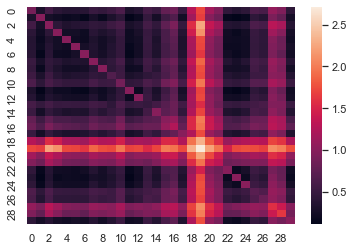

In [13]:
import seaborn as sns

sns.heatmap(sim)

In [15]:
from hmmlearn.hmm import GaussianHMM

ts = data[0]
hmm = GaussianHMM(n_components=5)
hmm.fit(ts)


GaussianHMM(n_components=5)

In [16]:
Z = hmm.predict(ts)
Z

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0])

In [ ]:
def shape_prob(x, mu, sigma):
    first = 1 / (2 * np.pi * sigma**2)
    second = -((x - mu)**2 / )

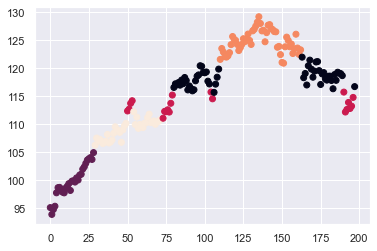

In [20]:
import matplotlib.pyplot as plt
x = list(range(ts.shape[0]))

fig, ax = plt.subplots()
ax.scatter(x, ts[:, 0], c=Z)

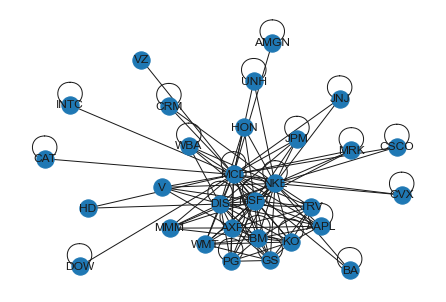

In [99]:
import networkx as nx

A = sim.copy()
A[A < 0.8] = 0
G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())), tickers)))

nx.draw(G, pos=nx.spring_layout(G), with_labels=True)

In [79]:
from hmmlearn import hmm

model = hmm.GaussianHMM(n_components=4)
model.fit(data[1])

GaussianHMM(n_components=4)

In [ ]:
p, s = model.score_samples(X_1)

In [17]:
log_p = model._compute_log_likelihood(X_1)

In [19]:
from scipy.spatial.distance import jensenshannon as js

js(log_p[:, 0], log_p[:, 1])

0.35226089940436894

In [80]:
from morphelia.time_series.hmm import HMM_similarity

HMM_similarity(model, model, data[1], data[1])


0.9997328249812861

In [85]:
np.triu_indices(10)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
        5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 9], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4,
        5, 6, 7, 8, 9, 3, 4, 5, 6, 7, 8, 9, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8,
        9, 6, 7, 8, 9, 7, 8, 9, 8, 9, 9], dtype=int64))

In [88]:
list(zip(X_1[, ], X_2[0, :]))

[(23.00909728826747, -1.3354367582373112),
 (33.56822732288305, -0.5913742291423297)]